In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
file_path='CleanData/'

## A

In [9]:
# Read Data
anno_train = pd.read_csv(file_path+'labelled-reddit-2021-08-12-A-PK.csv')
anno_val = pd.read_csv(file_path+'labelled-reddit-2021-08-12-A-CW.csv')

In [10]:
display(anno_train.head(1))
print(anno_train.columns)

,file_name,parent_file,number_of_segments,number_of_voices_parent_file,extra_sounds,parent_label,segment_label,noisy,Notes
0,00g8dfgpqpt61_processed_0,00g8dfgpqpt61,3.0,9999.0,"clapping, coughing",0.0,0.0,1.0,Only laughing


Index(['file_name', 'parent_file', 'number_of_segments',
       'number_of_voices_parent_file', 'extra_sounds', 'parent_label',
       'segment_label', 'noisy', 'Notes'],
      dtype='object')


In [11]:
display(anno_val.head(1))
print(anno_val.columns)

,file_name,parent_file,number_of_segments,number_of_voices_in_parent,segment_label,parent_label,Noisy,extra sounds,Notes
0,00g8dfgpqpt61,00g8dfgpqpt61_processed_0,3,NaN,0.0,0.0,1.0,NaN,NaN


Index(['file_name', 'parent_file', 'number_of_segments',
       'number_of_voices_in_parent', 'segment_label', 'parent_label', 'Noisy',
       'extra sounds', 'Notes'],
      dtype='object')


In [12]:
# Correct val file column names
# Run for: A-CW
anno_val.columns=['parent_file','file_name', 'number_of_segments',
       'number_of_voices_in_parent', 'segment_label', 'parent_label', 'noisy',
       'extra sounds', 'Notes']
anno_val.head(1)

,parent_file,file_name,number_of_segments,number_of_voices_in_parent,segment_label,parent_label,noisy,extra sounds,Notes
0,00g8dfgpqpt61,00g8dfgpqpt61_processed_0,3,NaN,0.0,0.0,1.0,NaN,NaN


In [13]:
# Check for nulls
anno_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   file_name                     942 non-null    object 
 1   parent_file                   942 non-null    object 
 2   number_of_segments            942 non-null    float64
 3   number_of_voices_parent_file  942 non-null    float64
 4   extra_sounds                  410 non-null    object 
 5   parent_label                  942 non-null    float64
 6   segment_label                 942 non-null    float64
 7   noisy                         942 non-null    float64
 8   Notes                         15 non-null     object 
dtypes: float64(5), object(4)
memory usage: 70.4+ KB


In [14]:
# Check for nulls
anno_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   parent_file                 934 non-null    object 
 1   file_name                   934 non-null    object 
 2   number_of_segments          934 non-null    int64  
 3   number_of_voices_in_parent  0 non-null      float64
 4   segment_label               933 non-null    float64
 5   parent_label                933 non-null    float64
 6   noisy                       933 non-null    float64
 7   extra sounds                39 non-null     object 
 8   Notes                       0 non-null      float64
dtypes: float64(5), int64(1), object(3)
memory usage: 65.8+ KB


In [15]:
segment_label = 'segment_label'
parent_label = 'parent_label'

anno_train['file_name'] = anno_train['file_name'].str.strip()
anno_val['file_name'] = anno_val['file_name'].str.strip()

In [16]:
# join 
df_merged = pd.merge(anno_train,anno_val,on='file_name',how='left',suffixes=('_train', '_val'))
df_merged

,file_name,parent_file_train,number_of_segments_train,number_of_voices_parent_file,extra_sounds,parent_label_train,segment_label_train,noisy_train,Notes_train,parent_file_val,number_of_segments_val,number_of_voices_in_parent,segment_label_val,parent_label_val,noisy_val,extra sounds,Notes_val
0,00g8dfgpqpt61_processed_0,00g8dfgpqpt61,3.0,9999.0,"clapping, coughing",0.0,0.0,1.0,Only laughing,00g8dfgpqpt61,3.0,NaN,0.0,0.0,1.0,NaN,NaN
1,00g8dfgpqpt61_processed_1,00g8dfgpqpt62,3.0,9999.0,clapping,0.0,0.0,1.0,Only laughing,00g8dfgpqpt61,3.0,NaN,0.0,0.0,1.0,NaN,NaN
2,00g8dfgpqpt61_processed_2,00g8dfgpqpt63,3.0,9999.0,NaN,0.0,0.0,1.0,Only laughing,00g8dfgpqpt61,3.0,NaN,0.0,0.0,1.0,NaN,NaN
3,01avx2fm1t961_processed_0,01avx2fm1t961,5.0,9999.0,baby crying,3.0,3.0,1.0,NaN,01avx2fm1t961,5.0,NaN,3.0,3.0,1.0,NaN,NaN
4,01avx2fm1t961_processed_1,01avx2fm1t961,5.0,9999.0,baby crying,3.0,2.0,1.0,NaN,01avx2fm1t961,5.0,NaN,3.0,3.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### <b> Match or No Match & Weighted Match <b>
#### 100%

In [17]:
# IOE on segment label
print('100%')
df_merged['match_s'] = np.where(df_merged[segment_label+'_train'] == df_merged[segment_label+'_val'], 1, 0)
df_merged['match_s_diff'] = df_merged[segment_label+'_train'] - df_merged[segment_label+'_val'] 
df_merged['match_s_diff_abs'] = df_merged['match_s_diff'].abs()
print('Segment: ')
print('Matches:',df_merged['match_s'].sum())
print('Total:',df_merged['match_s'].count())
print('Segment Unweighted IOE:', df_merged['match_s'].sum()/df_merged['match_s'].count()*100)
print('Segment Weighted IOE (Mean Absolute Error):', df_merged['match_s_diff_abs'].mean(),'\n')

# IOE on parent label
df_merged['match_p'] = np.where(df_merged[parent_label+'_train'] == df_merged[parent_label+'_val'], 1, 0)
df_merged['match_p_diff'] = df_merged[parent_label+'_train'] - df_merged[parent_label+'_val'] 
df_merged['match_p_diff_abs'] = df_merged['match_p_diff'].abs()
print('Parent: ')
print('Matches:',df_merged['match_p'].sum())
print('Total:',df_merged['match_p'].count())
print('Parent IOE:', df_merged['match_p'].sum()/df_merged['match_p'].count()*100)
print('Parent Weighted IOE (Mean Absolute Error):', df_merged['match_p_diff_abs'].mean(),'\n')

# IOE on Noise
df_merged['match_n'] = np.where(df_merged['noisy'+'_train'] == df_merged['noisy'+'_val'], 1, 0)
df_merged['match_n_diff'] = df_merged['noisy'+'_train'] - df_merged['noisy'+'_val'] 
df_merged['match_n_diff_abs'] = df_merged['match_n_diff'].abs()
print('Noisy: ')
print('Matches:',df_merged['match_n'].sum())
print('Total:',df_merged['match_n'].count())
print('Noisy IOE:', df_merged['match_n'].sum()/df_merged['match_n'].count()*100)

100%
Segment: 
Matches: 513
Total: 999
Segment Unweighted IOE: 51.35135135135135
Segment Weighted IOE (Mean Absolute Error): 0.6032608695652174 

Parent: 
Matches: 568
Total: 999
Parent IOE: 56.85685685685685
Parent Weighted IOE (Mean Absolute Error): 0.4706521739130435 

Noisy: 
Matches: 743
Total: 999
Noisy IOE: 74.37437437437437


#### Distribution of train - val difference values (error)
##### Segment

,match_s_diff,match_s
0,-3.0,40
1,-2.0,37
2,-1.0,180
3,0.0,513
4,1.0,121
5,2.0,27
6,3.0,2


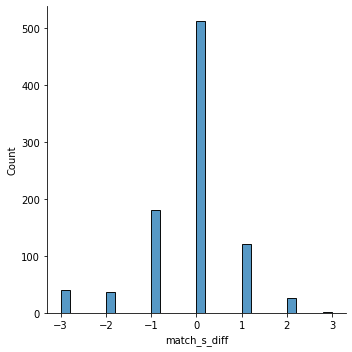

In [18]:
# train - val difference histogram
temp = df_merged.groupby('match_s_diff')['match_s'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_s_diff']))

##### Parent

,match_p_diff,match_p
0,-3.0,38
1,-2.0,5
2,-1.0,239
3,0.0,568
4,1.0,70


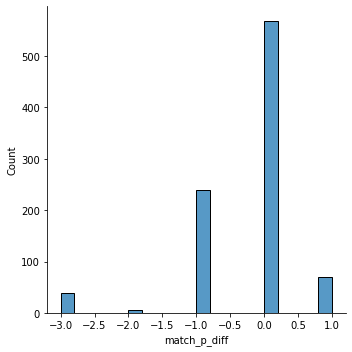

In [19]:
temp = df_merged.groupby('match_p_diff')['match_p'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_p_diff']))

##### Noisy

,match_n_diff,match_n
0,-1.0,151
1,0.0,743
2,1.0,26


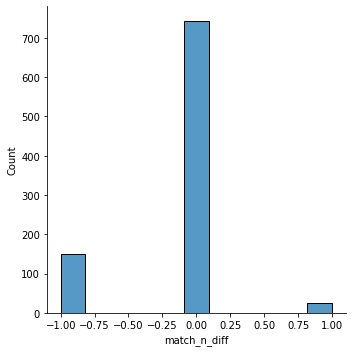

In [20]:
temp = df_merged.groupby('match_n_diff')['match_n'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_n_diff']))

#### <b> Match or No Match <b>
#### 50%

In [14]:
# IOE on segment label
print('50%')
df_sample = df_merged.sample(frac=0.50)
print('Segment: ')
print('Matches:',df_sample['match_s'].sum())
print('Total:',df_sample['match_s'].count())
print('Segment IOE:', df_sample['match_s'].sum()/df_sample['match_s'].count()*100,'\n')

# IOE on parent label
print('Parent: ')
print('Matches:',df_sample['match_p'].sum())
print('Total:',df_sample['match_p'].count())
print('Parent IOE:', df_sample['match_p'].sum()/df_sample['match_p'].count()*100,'\n')

# IOE on Noise
print('Noisy: ')
print('Matches:',df_sample['match_n'].sum())
print('Total:',df_sample['match_n'].count())
print('Noisy IOE:', df_sample['match_n'].sum()/df_sample['match_n'].count()*100)

50%
Segment: 
Matches: 254
Total: 471
Segment IOE: 53.92781316348195 

Parent: 
Matches: 281
Total: 471
Parent IOE: 59.660297239915074 

Noisy: 
Matches: 370
Total: 471
Noisy IOE: 78.55626326963908


## E

In [15]:
# Read Data
anno_train = pd.read_excel(file_path+'labelled-reddit-2021-08-12-E-VP.xlsx')
anno_val = pd.read_excel(file_path+'labelled-reddit-2021-08-12-E-PK.xlsx')

In [16]:
display(anno_train.head(1))
print(anno_train.columns)

,File name,Parent file,Number of Segments,Number of voices parent,Segment label,extra sounds,Parent label,Notes,Noisy
0,hpawo16k1s961_processed_0,hpawo16k1s961,2,1,2,"Crowd yelling, wind blowing",2,The crowd is yelling and may be aggressive,1


Index(['File name', 'Parent file', 'Number of Segments',
       'Number of voices parent', 'Segment label', 'extra sounds',
       'Parent label', 'Notes', 'Noisy'],
      dtype='object')


In [17]:
display(anno_val.head(1))
print(anno_val.columns)

,File Name,Parent file,Number of Segments,Noisy,Number of voices parent,extra sounds,Parent label,Segment label,Notes
0,hpawo16k1s961_processed_0,hpawo16k1s961,2,1,1,crowd protesting,0,0,NaN


Index(['File Name', 'Parent file', 'Number of Segments', 'Noisy',
       'Number of voices parent', 'extra sounds', 'Parent label',
       'Segment label', 'Notes'],
      dtype='object')


In [18]:
# Correct val file column names
# Run for: E-VP
anno_train.columns=['File Name', 'Parent file', 'Number of Segments',
       'Number of voices parent', 'Segment label', 'extra sounds',
       'Parent label', 'Notes', 'Noisy']
anno_train.head(1)

,File Name,Parent file,Number of Segments,Number of voices parent,Segment label,extra sounds,Parent label,Notes,Noisy
0,hpawo16k1s961_processed_0,hpawo16k1s961,2,1,2,"Crowd yelling, wind blowing",2,The crowd is yelling and may be aggressive,1


In [19]:
# Check for nulls
anno_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   File Name                1058 non-null   object
 1   Parent file              1058 non-null   object
 2   Number of Segments       1058 non-null   int64 
 3   Number of voices parent  1058 non-null   int64 
 4   Segment label            1058 non-null   int64 
 5   extra sounds             839 non-null    object
 6   Parent label             1058 non-null   int64 
 7   Notes                    1057 non-null   object
 8   Noisy                    1058 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 74.5+ KB


In [20]:
# Check for nulls
anno_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   File Name                1052 non-null   object
 1   Parent file              1052 non-null   object
 2   Number of Segments       1052 non-null   int64 
 3   Noisy                    1052 non-null   int64 
 4   Number of voices parent  1052 non-null   int64 
 5   extra sounds             570 non-null    object
 6   Parent label             1052 non-null   int64 
 7   Segment label            1052 non-null   int64 
 8   Notes                    8 non-null      object
dtypes: int64(5), object(4)
memory usage: 74.1+ KB


In [21]:
segment_label = 'Segment label'
parent_label = 'Parent label'
file_name= 'File Name'

anno_train[file_name] = anno_train[file_name].str.strip()
anno_val[file_name] = anno_val[file_name].str.strip()

In [22]:
# join 
df_merged = pd.merge(anno_train,anno_val,on=file_name,how='left',suffixes=('_train', '_val'))
df_merged

,File Name,Parent file_train,Number of Segments_train,Number of voices parent_train,Segment label_train,extra sounds_train,Parent label_train,Notes_train,Noisy_train,Parent file_val,Number of Segments_val,Noisy_val,Number of voices parent_val,extra sounds_val,Parent label_val,Segment label_val,Notes_val
0,hpawo16k1s961_processed_0,hpawo16k1s961,2,1,2,"Crowd yelling, wind blowing",2,The crowd is yelling and may be aggressive,1,hpawo16k1s961,2.0,1.0,1.0,crowd protesting,0.0,0.0,NaN
1,hpawo16k1s961_processed_1,hpawo16k1s961,2,1,2,"Crowd yelling, wind blowing",2,The crowd is yelling and may be aggressive,1,hpawo16k1s961,2.0,1.0,1.0,crowd protesting,0.0,0.0,NaN
2,hqztlcsmm1k51_processed_0,hqztlcsmm1k51,3,1,0,Clicking,0,"The man uses suggestive language, but there is...",0,hqztlcsmm1k51,3.0,0.0,1.0,NaN,0.0,0.0,NaN
3,hqztlcsmm1k51_processed_1,hqztlcsmm1k51,3,1,0,Clicking,0,There is no aggression heard in the audio file,0,hqztlcsmm1k51,3.0,0.0,1.0,NaN,0.0,0.0,NaN
4,hqztlcsmm1k51_processed_2,hqztlcsmm1k51,3,1,0,NaN,0,There is no aggression heard in the audio file,0,hqztlcsmm1k51,3.0,0.0,1.0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,loch7b5a0cz51_processed_5,loch7b5a0cz51,19,2,2,"chatter, music",2,Someone is yelling in the background,1,loch7b5a0cz51,19.0,0.0,2.0,crowd,0.0,0.0,NaN
1054,loch7b5a0cz51_processed_6,loch7b5a0cz51,19,2,2,"chatter, music",2,Someone is yelling in the background,1,loch7b5a0cz51,19.0,0.0,1.0,crowd,0.0,0.0,NaN
1055,loch7b5a0cz51_processed_7,loch7b5a0cz51,19,2,0,"chatter, music",2,There is no aggression heard in the audio file,1,loch7b5a0cz51,19.0,0.0,1.0,crowd,0.0,0.0,NaN
1056,loch7b5a0cz51_processed_8,loch7b5a0cz51,19,2,1,"chatter, music",2,One man in the background raises his voice agg...,1,loch7b5a0cz51,19.0,0.0,1.0,crowd,0.0,0.0,NaN


#### <b> Match or No Match & Weighted Match<b>
#### 100%

In [23]:
# IOE on segment label
print('100%')
df_merged['match_s'] = np.where(df_merged[segment_label+'_train'] == df_merged[segment_label+'_val'], 1, 0)
df_merged['match_s_diff'] = df_merged[segment_label+'_train'] - df_merged[segment_label+'_val'] 
df_merged['match_s_diff_abs'] = df_merged['match_s_diff'].abs()
print('Segment: ')
print('Matches:',df_merged['match_s'].sum())
print('Total:',df_merged['match_s'].count())
print('Segment Unweighted IOE:', df_merged['match_s'].sum()/df_merged['match_s'].count()*100)
print('Segment Weighted IOE (Mean Absolute Error):', df_merged['match_s_diff_abs'].mean(),'\n')

# IOE on parent label
df_merged['match_p'] = np.where(df_merged[parent_label+'_train'] == df_merged[parent_label+'_val'], 1, 0)
df_merged['match_p_diff'] = df_merged[parent_label+'_train'] - df_merged[parent_label+'_val'] 
df_merged['match_p_diff_abs'] = df_merged['match_p_diff'].abs()
print('Parent: ')
print('Matches:',df_merged['match_p'].sum())
print('Total:',df_merged['match_p'].count())
print('Parent IOE:', df_merged['match_p'].sum()/df_merged['match_p'].count()*100)
print('Parent Weighted IOE (Mean Absolute Error):', df_merged['match_p_diff_abs'].mean(),'\n')

# IOE on Noise
df_merged['match_n'] = np.where(df_merged['Noisy'+'_train'] == df_merged['Noisy'+'_val'], 1, 0)
df_merged['match_n_diff'] = df_merged['Noisy'+'_train'] - df_merged['Noisy'+'_val'] 
df_merged['match_n_diff_abs'] = df_merged['match_n_diff'].abs()
print('Noisy: ')
print('Matches:',df_merged['match_n'].sum())
print('Total:',df_merged['match_n'].count())
print('Noisy IOE:', df_merged['match_n'].sum()/df_merged['match_n'].count()*100)
#print('Noisy Weighted IOE (Mean Absolute Error):', df_merged['match_n_diff_abs'].mean(),'\n')

100%
Segment: 
Matches: 543
Total: 1058
Segment Unweighted IOE: 51.32325141776938
Segment Weighted IOE (Mean Absolute Error): 0.6495238095238095 

Parent: 
Matches: 295
Total: 1058
Parent IOE: 27.882797731569
Parent Weighted IOE (Mean Absolute Error): 1.0104761904761905 

Noisy: 
Matches: 844
Total: 1058
Noisy IOE: 79.77315689981096


#### Distribution of train - val difference values (error)
##### Segment

,match_s_diff,match_s
0,-2.0,4
1,-1.0,74
2,0.0,543
3,1.0,282
4,2.0,123
5,3.0,24


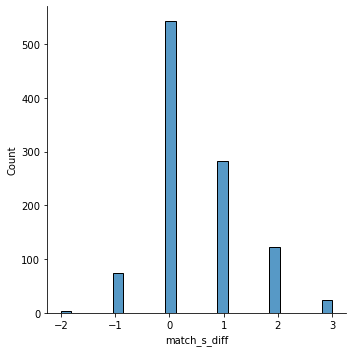

In [24]:
# train - val difference histogram
temp = df_merged.groupby('match_s_diff')['match_s'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_s_diff']))

##### Parent

,match_p_diff,match_p
0,0.0,295
1,1.0,472
2,2.0,260
3,3.0,23


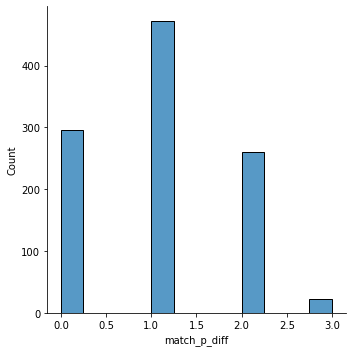

In [25]:
temp = df_merged.groupby('match_p_diff')['match_p'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_p_diff']))

##### Noisy

,match_n_diff,match_n
0,-3.0,1
1,-1.0,54
2,0.0,844
3,1.0,151


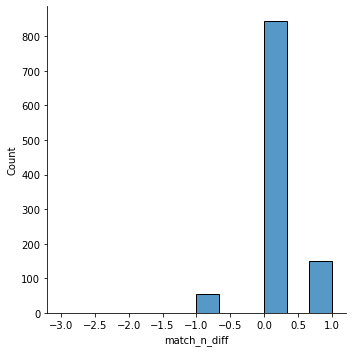

In [26]:
temp = df_merged.groupby('match_n_diff')['match_n'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_n_diff']))

#### <b> Match or No Match <b>
#### 50%

In [27]:
# IOE on segment label
print('50%')
df_sample = df_merged.sample(frac=0.50)
print('Segment: ')
print('Matches:',df_sample['match_s'].sum())
print('Total:',df_sample['match_s'].count())
print('Segment IOE:', df_sample['match_s'].sum()/df_sample['match_s'].count()*100,'\n')

# IOE on parent label
print('Parent: ')
print('Matches:',df_sample['match_p'].sum())
print('Total:',df_sample['match_p'].count())
print('Parent IOE:', df_sample['match_p'].sum()/df_sample['match_p'].count()*100,'\n')

# IOE on Noise
print('Noisy: ')
print('Matches:',df_sample['match_n'].sum())
print('Total:',df_sample['match_n'].count())
print('Noisy IOE:', df_sample['match_n'].sum()/df_sample['match_n'].count()*100)

50%
Segment: 
Matches: 269
Total: 529
Segment IOE: 50.85066162570888 

Parent: 
Matches: 158
Total: 529
Parent IOE: 29.867674858223065 

Noisy: 
Matches: 419
Total: 529
Noisy IOE: 79.20604914933837


## H

In [60]:
# Read Data
anno_train = pd.read_excel(file_path+'labelled-reddit-2021-08-31-H-TL_updated.xlsx')
anno_val = pd.read_excel(file_path+'labelled-reddit-2021-08-31-H-KK_SA.xlsx')

In [61]:
display(anno_train.head(1))
print(anno_train.columns)

,file_name,parent_file,number_of_segments,number_of_voices_parent_file,noisy,extra sounds,Parent label,Segment label,Notes
0,uortapdfw0x51_processed_0,uortapdfw0x51,8.0,2.0,NaN,NaN,2.0,2.0,NaN


Index(['file_name', 'parent_file', 'number_of_segments',
       'number_of_voices_parent_file', 'noisy', 'extra sounds', 'Parent label',
       'Segment label', 'Notes'],
      dtype='object')


In [62]:
display(anno_val.head(1))
print(anno_val.columns)

,file_name,parent_file,number_of_segments,number_of_voices_parent_file,noisy,extra_sounds,parent_label,segment_label,notes
0,uortapdfw0x51_processed_0,uortapdfw0x51,8,4,0.0,NaN,3.0,1,NaN


Index(['file_name', 'parent_file', 'number_of_segments',
       'number_of_voices_parent_file', 'noisy', 'extra_sounds', 'parent_label',
       'segment_label', 'notes'],
      dtype='object')


In [63]:
# Correct train file column names
# Run for H-TL
anno_train.columns=['file_name', 'parent_file', 'number_of_segments',
       'number_of_voices_parent_file', 'noisy', 'extra sounds', 'parent_label',
       'segment_label', 'Notes']

In [64]:
# Check for nulls
anno_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   file_name                     650 non-null    object 
 1   parent_file                   650 non-null    object 
 2   number_of_segments            650 non-null    float64
 3   number_of_voices_parent_file  621 non-null    float64
 4   noisy                         0 non-null      float64
 5   extra sounds                  104 non-null    object 
 6   parent_label                  634 non-null    float64
 7   segment_label                 633 non-null    float64
 8   Notes                         25 non-null     object 
dtypes: float64(5), object(4)
memory usage: 45.8+ KB


In [65]:
# Check for nulls
anno_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   file_name                     436 non-null    object 
 1   parent_file                   436 non-null    object 
 2   number_of_segments            436 non-null    int64  
 3   number_of_voices_parent_file  436 non-null    int64  
 4   noisy                         435 non-null    float64
 5   extra_sounds                  67 non-null     object 
 6   parent_label                  435 non-null    float64
 7   segment_label                 436 non-null    int64  
 8   notes                         22 non-null     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 30.8+ KB


In [66]:
segment_label = 'segment_label'
parent_label = 'parent_label'

anno_train['file_name'] = anno_train['file_name'].str.strip()
anno_val['file_name'] = anno_val['file_name'].str.strip()

In [67]:
# join 
df_merged = pd.merge(anno_train,anno_val,on='file_name',how='left',suffixes=('_train', '_val'))
df_merged

,file_name,parent_file_train,number_of_segments_train,number_of_voices_parent_file_train,noisy_train,extra sounds,parent_label_train,segment_label_train,Notes,parent_file_val,number_of_segments_val,number_of_voices_parent_file_val,noisy_val,extra_sounds,parent_label_val,segment_label_val,notes
0,uortapdfw0x51_processed_0,uortapdfw0x51,8.0,2.0,NaN,NaN,2.0,2.0,NaN,uortapdfw0x51,8.0,4.0,0.0,NaN,3.0,1.0,NaN
1,uortapdfw0x51_processed_1,uortapdfw0x51,8.0,2.0,NaN,NaN,2.0,1.0,NaN,uortapdfw0x51,8.0,4.0,0.0,NaN,3.0,0.0,woman2 is crying
2,uortapdfw0x51_processed_2,uortapdfw0x51,8.0,2.0,NaN,NaN,2.0,0.0,NaN,uortapdfw0x51,8.0,4.0,0.0,someone walking,3.0,0.0,no talking here
3,uortapdfw0x51_processed_3,uortapdfw0x51,8.0,2.0,NaN,NaN,2.0,0.0,NaN,uortapdfw0x51,8.0,4.0,0.0,NaN,3.0,0.0,no talking here
4,uortapdfw0x51_processed_4,uortapdfw0x51,8.0,2.0,NaN,NaN,2.0,2.0,NaN,uortapdfw0x51,8.0,4.0,0.0,NaN,3.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,zl1fow9ffo171_processed_12,zl1fow9ffo171,17.0,2.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
646,zl1fow9ffo171_processed_13,zl1fow9ffo171,17.0,2.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
647,zl1fow9ffo171_processed_14,zl1fow9ffo171,17.0,2.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,zl1fow9ffo171_processed_15,zl1fow9ffo171,17.0,2.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# Remove Nan Rows
df_merged = df_merged[~(df_merged['segment_label_train'].isna() | df_merged['segment_label_val'].isna())]
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 378
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   file_name                           372 non-null    object 
 1   parent_file_train                   372 non-null    object 
 2   number_of_segments_train            372 non-null    float64
 3   number_of_voices_parent_file_train  359 non-null    float64
 4   noisy_train                         0 non-null      float64
 5   extra sounds                        49 non-null     object 
 6   parent_label_train                  372 non-null    float64
 7   segment_label_train                 372 non-null    float64
 8   Notes                               8 non-null      object 
 9   parent_file_val                     372 non-null    object 
 10  number_of_segments_val              372 non-null    float64
 11  number_of_voices_parent_file_val    372 non-n

#### <b> Match or No Match & Weighted Match <b>
#### 100%

In [70]:
# IOE on segment label
print('100%')
df_merged['match_s'] = np.where(df_merged[segment_label+'_train'] == df_merged[segment_label+'_val'], 1, 0)
df_merged['match_s_diff'] = df_merged[segment_label+'_train'] - df_merged[segment_label+'_val'] 
df_merged['match_s_diff_abs'] = df_merged['match_s_diff'].abs()
print('Segment: ')
print('Matches:',df_merged['match_s'].sum())
print('Total:',df_merged['match_s'].count())
print('Segment Unweighted IOE:', df_merged['match_s'].sum()/df_merged['match_s'].count()*100)
print('Segment Weighted IOE (Mean Absolute Error):', df_merged['match_s_diff_abs'].mean(),'\n')

# IOE on parent label
df_merged['match_p'] = np.where(df_merged[parent_label+'_train'] == df_merged[parent_label+'_val'], 1, 0)
df_merged['match_p_diff'] = df_merged[parent_label+'_train'] - df_merged[parent_label+'_val'] 
df_merged['match_p_diff_abs'] = df_merged['match_p_diff'].abs()
print('Parent: ')
print('Matches:',df_merged['match_p'].sum())
print('Total:',df_merged['match_p'].count())
print('Parent IOE:', df_merged['match_p'].sum()/df_merged['match_p'].count()*100)
print('Parent Weighted IOE (Mean Absolute Error):', df_merged['match_p_diff_abs'].mean(),'\n')

# IOE on Noise
df_merged['match_n'] = np.where(df_merged['noisy'+'_train'] == df_merged['noisy'+'_val'], 1, 0)
df_merged['match_n_diff'] = df_merged['noisy'+'_train'] - df_merged['noisy'+'_val'] 
df_merged['match_n_diff_abs'] = df_merged['match_n_diff'].abs()
print('Noisy: ')
print('Matches:',df_merged['match_n'].sum())
print('Total:',df_merged['match_n'].count())
print('Noisy IOE:', df_merged['match_n'].sum()/df_merged['match_n'].count()*100)

100%
Segment: 
Matches: 132
Total: 372
Segment Unweighted IOE: 35.483870967741936
Segment Weighted IOE (Mean Absolute Error): 0.8870967741935484 

Parent: 
Matches: 132
Total: 372
Parent IOE: 35.483870967741936
Parent Weighted IOE (Mean Absolute Error): 0.8091397849462365 

Noisy: 
Matches: 0
Total: 372
Noisy IOE: 0.0


/var/folders/7b/v9yf5j856tggrfg1tm641t9c0000gn/T/ipykernel_4373/17326261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['match_s'] = np.where(df_merged[segment_label+'_train'] == df_merged[segment_label+'_val'], 1, 0)
/var/folders/7b/v9yf5j856tggrfg1tm641t9c0000gn/T/ipykernel_4373/17326261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['match_s_diff'] = df_merged[segment_label+'_train'] - df_merged[segment_label+'_val']
/var/folders/7b/v9yf5j856tggrfg1tm641t9c0000gn/T/ipykernel

#### Distribution of train - val difference values (error)
##### Segment

,match_s_diff,match_s
0,-3.0,7
1,-2.0,18
2,-1.0,40
3,0.0,132
4,1.0,118
5,2.0,56
6,3.0,1


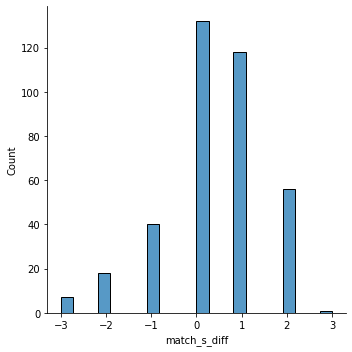

In [71]:
# train - val difference histogram
temp = df_merged.groupby('match_s_diff')['match_s'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_s_diff']))

##### Parent

,match_p_diff,match_p
0,-3.0,4
1,-2.0,13
2,-1.0,47
3,0.0,132
4,1.0,136
5,2.0,40


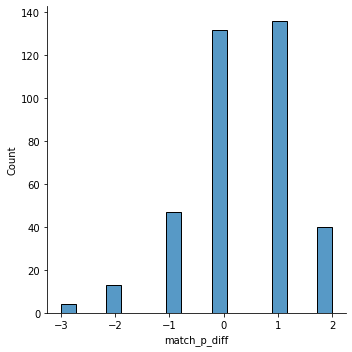

In [72]:
temp = df_merged.groupby('match_p_diff')['match_p'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_p_diff']))

##### Noisy

,match_n_diff,match_n


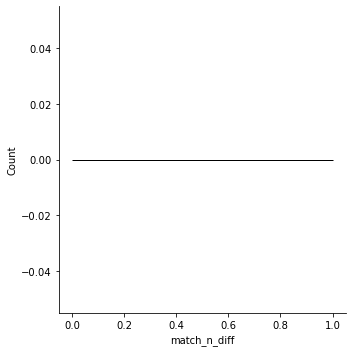

In [73]:
temp = df_merged.groupby('match_n_diff')['match_n'].count().reset_index()
display(temp)
display (sns.displot(df_merged['match_n_diff']))

#### <b> Match or No Match <b>
#### 50%

In [74]:
# IOE on segment label
print('50%')
df_sample = df_merged.sample(frac=0.50)
print('Segment: ')
print('Matches:',df_sample['match_s'].sum())
print('Total:',df_sample['match_s'].count())
print('Segment IOE:', df_sample['match_s'].sum()/df_sample['match_s'].count()*100,'\n')

# IOE on parent label
print('Parent: ')
print('Matches:',df_sample['match_p'].sum())
print('Total:',df_sample['match_p'].count())
print('Parent IOE:', df_sample['match_p'].sum()/df_sample['match_p'].count()*100,'\n')

# IOE on Noise
print('Noisy: ')
print('Matches:',df_sample['match_n'].sum())
print('Total:',df_sample['match_n'].count())
print('Noisy IOE:', df_sample['match_n'].sum()/df_sample['match_n'].count()*100)

50%
Segment: 
Matches: 67
Total: 186
Segment IOE: 36.02150537634409 

Parent: 
Matches: 66
Total: 186
Parent IOE: 35.483870967741936 

Noisy: 
Matches: 0
Total: 186
Noisy IOE: 0.0
